In [1]:
import urllib.request
import os

data_url="http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
data_file_path="data/titanic3.xls"

if not os.path.isfile(data_file_path):
    result = urllib.request.urlretrieve(data_url,data_file_path)
    print('download:',result)
else:
    print(data_file_path,'data file already exists')
    
    

data/titanic3.xls data file already exists


In [2]:
import numpy as np
import pandas as pd

In [3]:
df_data = pd.read_excel(data_file_path)
df_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
df_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


选取参与训练的数据

In [5]:
selected_cols=['survived','name','age','pclass','sex','sibsp','parch','fare','embarked']
df_data = df_data[selected_cols]
df_data[:5]

,survived,name,age,pclass,sex,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",29.0000,1,female,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",0.9167,1,male,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",2.0000,1,female,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,male,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,female,1,2,151.5500,S


In [6]:
df_data.isnull().sum()

survived      0
name          0
age         263
pclass        0
sex           0
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [7]:
avg_age = df_data['age'].mean()
df_data['age'] = df_data['age'].fillna(avg_age)
avg_fare = df_data['fare'].mean()
df_data['fare'] = df_data['fare'].fillna(avg_fare)
df_data['embarked'] = df_data['embarked'].fillna('S')
df_data.isnull().sum()

/home/subaochen/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/subaochen/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/subaochen/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

survived    0
name        0
age         0
pclass      0
sex         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

性别和港口字段数字化编码
这里不使用one-hot编码，，因为只有作为输出节点使用one-hot编码才有意义，便于和softmax-argmax后的预测值比较

In [8]:
df_data['sex'] = df_data['sex'].map({'female':0,'male':1}).astype(int)
df_data['embarked'] = df_data['embarked'].map({'C':1,'Q':2,'S':3}).astype(int)

/home/subaochen/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/subaochen/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
train_data = df_data.drop(['name'],axis=1)
# shuffle
train_data = train_data.sample(frac=1)
train_data[:5]

,survived,age,pclass,sex,sibsp,parch,fare,embarked
169,0,50.0,1,0,0,0,28.7125,1
584,1,32.5,2,0,0,0,13.0000,3
606,1,20.0,3,1,0,0,7.9250,3
407,1,29.0,2,0,1,0,26.0000,3
11,1,18.0,1,0,1,0,227.5250,1


分离特征值和标签值

In [10]:
ndarray_data = train_data.values
features = ndarray_data[:,1:]
labels = ndarray_data[:,0]

In [11]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
norm_features = minmax_scale.fit_transform(features)
norm_features[:5]

array([[0.62421696, 0.        , 0.        , 0.        , 0.        ,
        0.05604307, 0.        ],
       [0.40501019, 0.5       , 0.        , 0.        , 0.        ,
        0.02537431, 1.        ],
       [0.24843392, 1.        , 1.        , 0.        , 0.        ,
        0.01546857, 1.        ],
       [0.36116884, 0.5       , 0.        , 0.125     , 0.        ,
        0.05074862, 1.        ],
       [0.22338172, 0.        , 0.        , 0.125     , 0.        ,
        0.44409922, 0.        ]])

In [12]:
train_size = int(len(train_data) * 0.8)
x_train = norm_features[:train_size]
y_train = labels[:train_size]
x_test = norm_features[train_size:]
y_test = labels[train_size:]

建立模型

In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=32,
                               input_dim=7,
                               use_bias=True,
                               kernel_initializer='uniform',
                               bias_initializer='zeros',
                               activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=16,activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
logdir="./logs"
checkpoint_path="./checkpoint/titanic-{epoch:02d}-{val_loss:.2f}.ckpt"
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=2),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      verbose=1,
                                      period=5)
]

In [16]:
train_history=model.fit(x=x_train,
                       y=y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=40,
                       callbacks=callbacks,
                       verbose=2)

Train on 837 samples, validate on 210 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 0.6694 - acc: 0.5926 - val_loss: 0.6491 - val_acc: 0.6381
Epoch 2/100
 - 0s - loss: 0.6592 - acc: 0.6165 - val_loss: 0.6440 - val_acc: 0.6381
Epoch 3/100
 - 0s - loss: 0.6529 - acc: 0.6165 - val_loss: 0.6340 - val_acc: 0.6381
Epoch 4/100
 - 0s - loss: 0.6442 - acc: 0.6165 - val_loss: 0.6225 - val_acc: 0.6381
Epoch 5/100

Epoch 00005: saving model to ./checkpoint/titanic-05-0.61.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
 - 0s - loss: 0.6321 - acc: 0.6225 - val_loss: 0.6061 - val_acc: 0.6476
Epoch 6/100
 - 0s - loss: 0.6156 - acc: 0.6332 - val_loss: 0.5824 - val_acc: 0.7286
Epoch 7/100
 - 0s - loss: 0.5988 - acc: 0.6906 - val_loss: 0.5503 - val_acc: 0.7429
Epoch 8/100
 - 0s - loss: 0.5755 - acc: 0.7503 - val_loss: 0.5221 -

 - 0s - loss: 0.4718 - acc: 0.7909 - val_loss: 0.4118 - val_acc: 0.8048
Epoch 46/100
 - 0s - loss: 0.4717 - acc: 0.7838 - val_loss: 0.4028 - val_acc: 0.8286
Epoch 47/100
 - 0s - loss: 0.4701 - acc: 0.7885 - val_loss: 0.4068 - val_acc: 0.8190
Epoch 48/100
 - 0s - loss: 0.4695 - acc: 0.7873 - val_loss: 0.4034 - val_acc: 0.8286
Epoch 49/100
 - 0s - loss: 0.4709 - acc: 0.7849 - val_loss: 0.4003 - val_acc: 0.8333
Epoch 50/100

Epoch 00050: saving model to ./checkpoint/titanic-50-0.41.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4715 - acc: 0.7897 - val_loss: 0.4051 - val_acc: 0.8190
Epoch 51/100
 - 0s - loss: 0.4697 - acc: 0.7885 - val_loss: 0.4032 - val_acc: 0.8190
Epoch 52/100
 - 0s - loss: 0.4688 - acc: 0.7897 - val_loss: 0.4034 - val_acc: 0.8190
Epoch 53/100
 - 0s - loss: 0.4692 - acc: 0.7873 - val_loss: 0.4005 - val_acc: 0.8333
Epoch 54/100
 - 0s - loss: 0.4695 - acc: 0.7873 - val_loss: 0.4028 - val_acc: 0.8238
Epoch 55/100

Epoch 00055: saving model to 

Epoch 94/100
 - 0s - loss: 0.4666 - acc: 0.7909 - val_loss: 0.4090 - val_acc: 0.8095
Epoch 95/100

Epoch 00095: saving model to ./checkpoint/titanic-95-0.41.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4675 - acc: 0.7945 - val_loss: 0.4081 - val_acc: 0.8143
Epoch 96/100
 - 0s - loss: 0.4687 - acc: 0.7802 - val_loss: 0.4002 - val_acc: 0.8476
Epoch 97/100
 - 0s - loss: 0.4665 - acc: 0.7909 - val_loss: 0.4050 - val_acc: 0.8143
Epoch 98/100
 - 0s - loss: 0.4673 - acc: 0.7921 - val_loss: 0.4000 - val_acc: 0.8429
Epoch 99/100
 - 0s - loss: 0.4666 - acc: 0.7885 - val_loss: 0.4045 - val_acc: 0.8190
Epoch 100/100

Epoch 00100: saving model to ./checkpoint/titanic-100-0.40.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
 - 0s - loss: 0.4665 - acc: 0.7861 - val_loss: 0.4016 - val_acc: 0.8381


In [17]:
train_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [18]:
import matplotlib.pyplot as plt

def visual_train_history(train_history,train_metrics,validation_metrics):
    plt.plot(train_history.history[train_metrics])
    plt.plot(train_history.history[validation_metrics])
    
    plt.title('Train history')
    plt.ylabel(train_metrics)
    plt.xlabel('epoch')
    plt.legend(['train','validtion'])
    plt.show()

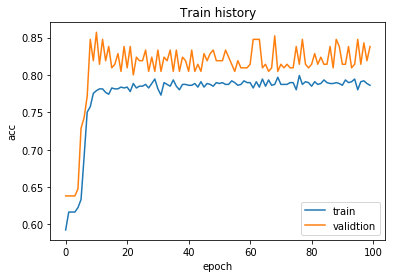

In [19]:
visual_train_history(train_history,'acc','val_acc')

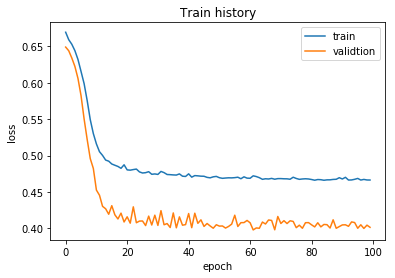

In [20]:
visual_train_history(train_history,'loss','val_loss')